<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/HW10/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import matplotlib
import scipy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Read In the Data

In [109]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv')
genes

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [110]:
genes = genes.drop(columns = "Unnamed: 0")
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Explore the Data

In [111]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [112]:
genes.shape

(4224, 74)

In [113]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

# Preprocess the Data

In [114]:
scaledgenes = skl.preprocessing.scale(genes, axis = 0, with_mean = True, with_std = True, copy = True)
scaledgenes

array([[-0.10390895, -1.44631227,  0.54115292, ...,  1.13208158,
         0.49320283,  0.95276799],
       [-0.73943251,  0.53879462,  0.69516384, ...,  0.95494912,
        -0.6950822 ,  0.5877214 ],
       [ 0.01024745, -0.52957084, -0.45538124, ..., -0.40602471,
        -0.51034181, -0.08564642],
       ...,
       [ 0.00563416,  0.42958277, -0.26605602, ...,  0.58686221,
         0.25470697, -0.12942973],
       [-0.9117855 ,  0.45020596, -0.87974112, ...,  0.50842701,
         0.26562461,  0.29644913],
       [-1.61885048, -0.07257629, -0.65427304, ..., -0.36455808,
        -1.06687976, -0.55175871]])

In [115]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [0]:
from sklearn.manifold import TSNE

In [0]:
twodproj1 = skl.manifold.TSNE(n_components=2).fit_transform(scaledgenes)
#twodproj1 = twodproj.fit_transform(scaledgenes)


In [118]:
twodproj1.shape

(4224, 2)

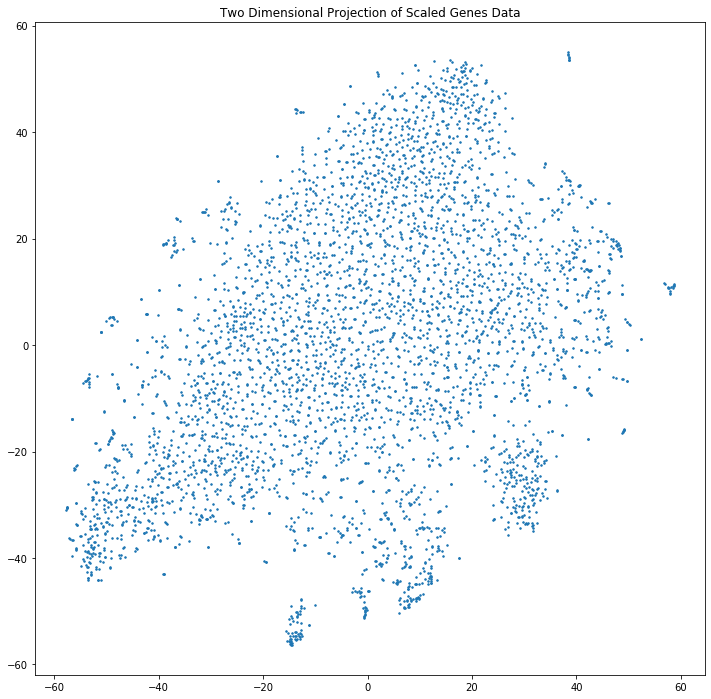

In [165]:
pl.figure(figsize = (12,12))
pl.title("Two Dimensional Projection of Scaled Genes Data")
pl.plot(twodproj1[:,0], twodproj1[:,1], '.', markersize=3)
txt = "Figure1: two dimensional projection of the scaled gene data from the original 75 dimensions."

**Figure 1**: Two dimensional projection of the 75 dimensional space that is the original data. 

In [0]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar

# K-Means Clustering


312576.00000000006

251076.64173410618

231187.35509465548

232166.0233257861

232208.4769098817

226408.68169421615

226644.13993309592

224520.6211586187

221404.23196156794

221211.29909492724



Text(0, 0.5, 'Count')

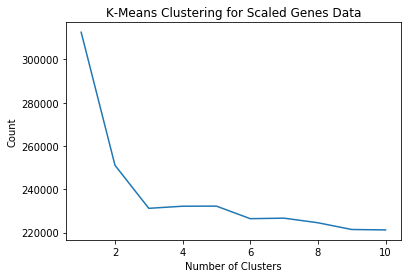

In [175]:
tv = []
for i in range(1, 11):
  c = cluster.k_means(scaledgenes, i)
  tv.append(calICVar(scaledgenes,c[1]))
  print("")
pl.plot(range(1, 11), tv)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')


**Figure 2**: K means clustering with an elbow at 3. This graph gives the optimal number of clusters at the elbow. Due to this, the optimal number of clusters is 3. 

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering in Two Dimensions')

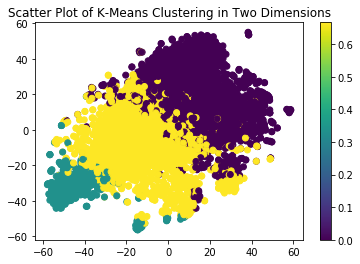

In [167]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering in Two Dimensions")

**Figure 3**: K means clustering of the scaled gene data with 3 clusters. 

# DBSCAN

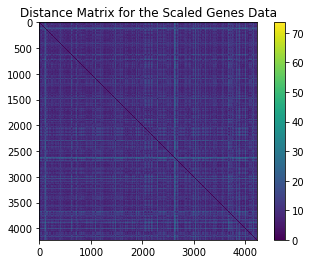

In [168]:
scaledmatrix = sp.spatial.distance.pdist(scaledgenes, metric = 'euclidean')

pl.imshow(sp.spatial.distance.squareform(scaledmatrix))
pl.title('Distance Matrix for the Scaled Genes Data')

pl.colorbar()

**Figure 4**: distance matrix of the scaled gene data with a squareform fit. There is a well defined structure to this. The diagonal line within the matrix is a series of zeros where the distance is equal to zero. Additionally, the brighter lines within the matrix are the outliers within the data. 

<span style="color:red">**-5 pts: wrong answer: There is no obvious structure but the small dynamic range impairs the visual inspection**</span>

Text(0, 0.5, 'Count')

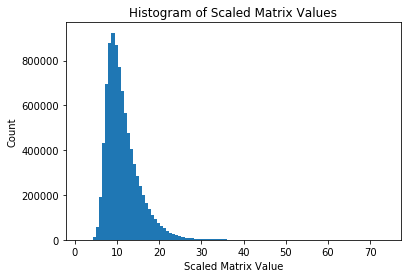

In [169]:
pl.hist(scaledmatrix, bins = 100)
pl.title('Histogram of Scaled Matrix Values')
pl.xlabel("Scaled Matrix Value")
pl.ylabel("Count")

**Figure 4**: Histogram of the scaled matrix data showing a maximum at a value of aproximately 11. 

In [125]:
scaledmatrix

array([4.53495137, 6.45229079, 8.01171518, ..., 9.03260968, 8.9762348 ,
       9.1764126 ])

In [157]:
dbscan = skl.cluster.DBSCAN(eps= 13.32, min_samples=250)
dbscan.fit(twodproj1)
set(dbscan.labels_)

{-1, 0, 1}

<span style="color:red">**-3 pts: wrong answer: chose an eps just below the mean. 13.32 is above 11**</span>

In [158]:
labels = dbscan.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(2, 143, 4224)

Text(0.5, 1.0, 'Scatter Plot of DBSCAN in Two Dimension')

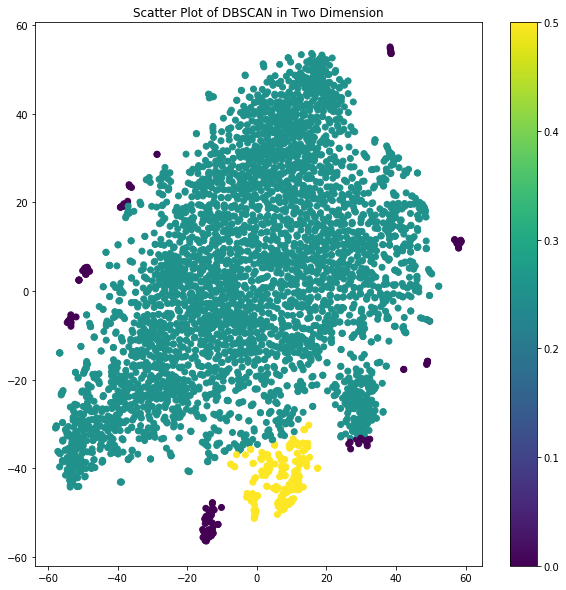

In [170]:
pl.figure(figsize=(10, 10))
pl.scatter(twodproj1[:,0], twodproj1[:,1],  c=(labels + 1) /4)
pl.colorbar()
pl.title('Scatter Plot of DBSCAN in Two Dimension')

**Figure 5**: Clustering of the DBSCAN fit to the two dimensional projection of the scaled gene data. Within this there are 3 clusters with a noticeable amount of noise. The amount of noise is significant however the ratio of noise to clustered data is relatively small. 

# Agglomerative Clustering 

In [0]:
sp.cluster.hierarchy.set_link_color_palette(['k','c','b','m'])

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
linkage_ward = linkage(scaledgenes, method = 'ward')

{'color_list': ['k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',

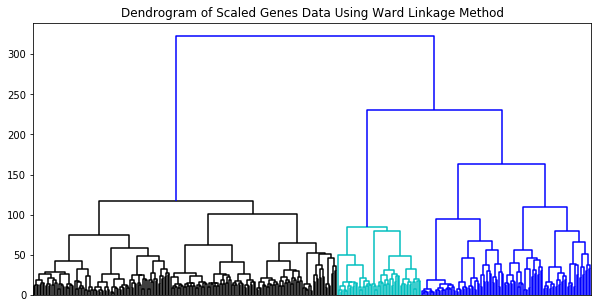

In [171]:
pl.figure(figsize= (10,5))
pl.title("Dendrogram of Scaled Genes Data Using Ward Linkage Method")
dendrogram(linkage_ward, p = 8, truncate_mode="level", no_labels=True)

**Figure 6**: Dendrogram of the scaled gene data showing three main branches within the figure. This result was achieved using the ward minimization algorithm. 

In [0]:
linkage_average = linkage(scaledgenes, method = 'complete')

{'color_list': ['k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',

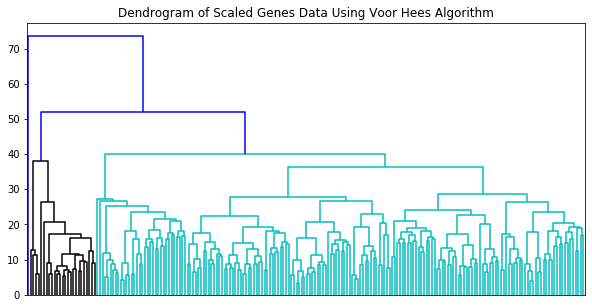

In [172]:
figure(figsize= (10,5))
pl.title('Dendrogram of Scaled Genes Data Using Voor Hees Algorithm')
dendrogram(linkage_average, p = 10, truncate_mode='level', no_labels=True)

**Figure 7**: Dendrogram of the scaled gene data. Within this figure there are 2 main branches, however the first one is extremely small. The method used to find this dendrogram was the Voor Hees algorithm. 

<span style="color:red">**-5 pts: not on the point for two linkages difference. they used different distance algorithm, complete uses max distance**</span>

312576.00000000006
265786.21130934544
240649.59622656365
240557.2366028278
239961.49171955144
235074.38528557075
234083.16084309437
232028.39531397203
228615.8484280025
228470.48992579285


Text(0, 0.5, 'Count')

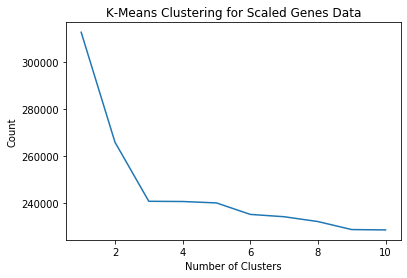

In [176]:
tv_ag = []

np.random.seed(180135)

for i in range(1, 11):
    agger = skl.cluster.AgglomerativeClustering(n_clusters = i).fit(scaledgenes)
    km = agger.labels_
    tv_ag.append(calICVar(scaledgenes, agger.labels_))

pl.plot(range(1,11), tv_ag)
pl.title('K-Means Clustering for Scaled Genes Data')
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

**Figure 8**: K means clustering with an elbow at 3. This graph gives the optimal number of clusters at the elbow. Due to this, the optimal number of clusters is 3.

Text(0.5, 1.0, 'Agglomerative Clustering for the Scaled Genes Data')

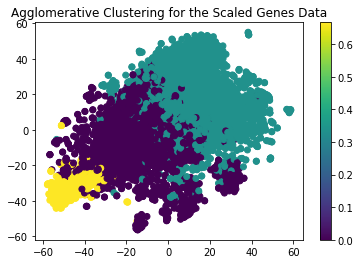

In [174]:
genes_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(scaledgenes)

pl.scatter(twodproj1[:,0], twodproj1[:,1], c=genes_agcluster.labels_/
         genes_agcluster.n_clusters)
pl.colorbar();
pl.title('Agglomerative Clustering for the Scaled Genes Data')

**Figure 9**: Clustering of the scaledgenes data using agglomerative clustering as opposed to DBSCAN. Similar to the DBSCAN, 3 clustering groups were achieved, which is in agreement with the K Means clustering method.  

<span style="color:red">**+10*32/40=8 pts: AC score is higher than DBSCAN, so, AC as required and DBSCAN as EC**</span>